In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from classy import Class

In [2]:
z_pk = [200.0,100.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1]
cosmo = Class()
cosmo.set({'output':'dTk, lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'radiation_streaming_approximation':3,
           'l_max_g':100,
           'l_max_ur':100,
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':40,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'l_logstep':10,
           'l_linstep':300,
           'P_k_max_h/Mpc' : 0.1,
           'lensing':'no',
           'evolver':0
            })
cosmo.compute()



 reio affects the small k after z = 10, baryons affect the small scales significantly
 is there a sign difference between 3hc term?

In [3]:
tks0 = cosmo.get_transfer(z_pk[-1])
tks5 = cosmo.get_transfer(z_pk[-2])
tks10 = cosmo.get_transfer(z_pk[-3])
tks50 = cosmo.get_transfer(z_pk[-4])
tks100 = cosmo.get_transfer(z_pk[-5])
tks200 = cosmo.get_transfer(z_pk[-6])
print tks0.viewkeys()
z_pk[-5]

dict_keys(['d_tot', 'L_prime', 'L', 'd_ur', 'd_cdm', 'd_b', 'd_g', 'k (h/Mpc)'])


100.0

(0.0001, 1000000)

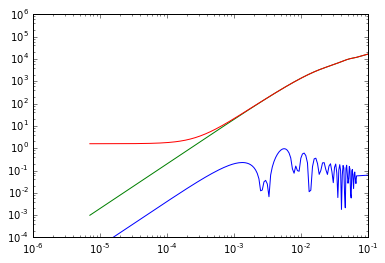

In [24]:
k = tks0['k (h/Mpc)']*cosmo.h()
plt.loglog(k,np.abs( k*tks0['L']),
           k,np.abs( tks0['L_prime'] ),
           k,np.abs( tks0['d_cdm'] ))
plt.ylim([0.0001,1000000])

(0.1, 1000000)

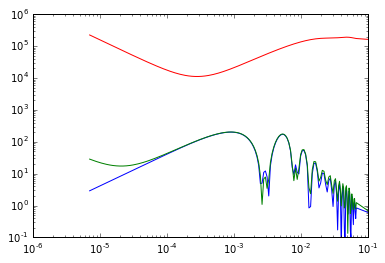

In [15]:
k = tks0['k (h/Mpc)']*cosmo.h()
plt.loglog(k,np.abs( tks0['L']),
           k,np.abs( tks0['L_prime'] ),
           k,np.abs(1/k* tks0['d_cdm'] ))
plt.ylim([0.1,1000000])

(1, 500)

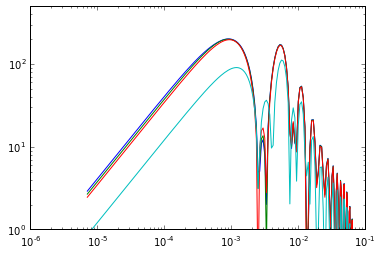

In [31]:
k = tks0['k (h/Mpc)']*cosmo.h()
plt.loglog(k,np.abs(tks0['L_prime']/tks0['L_prime']  *tks0['L'] ),
           k,np.abs(tks0['L_prime']/tks5['L_prime']*tks5['L'] ),
          k,np.abs(tks0['L_prime']/tks10['L_prime'] *tks10['L'] ),
          k,np.abs(tks0['L_prime']/tks50['L_prime']*tks50['L'] ),
          k,np.abs(tks0['L_prime']/tks100['L_prime'] *tks100['L'] ))
plt.ylim([1,500])

what about baryons in the evolving framweork, i need the actual growth functions!

(100000, 10000000000000)

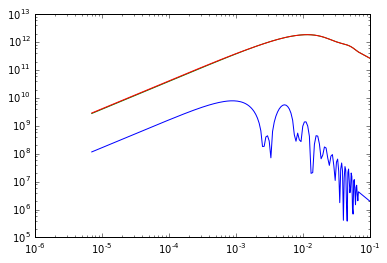

In [33]:
k = tks0['k (h/Mpc)']*cosmo.h()
plt.loglog(
           k,np.abs((tks0['L_prime']- k*tks0['L']) *(tks0['L_prime'] - k*tks0['L']) /k/k/k - tks0['L_prime']*tks0['L_prime'] /k/k/k),
           k,np.abs(tks0['L_prime']*tks0['L_prime'] /k/k/k),
           k,np.abs((tks0['L_prime']- k*tks0['L']) *(tks0['L_prime'] - k*tks0['L']) /k/k/k))
plt.ylim([100000,10000000000000])

In [34]:
pts = cosmo.get_perturbations()['scalar']
print len(pts)
pt = pts[1]
print pt.viewkeys()

4
dict_keys(['a', 'theta_g', 'phi', 'pol0_g', 'theta_b', 'theta_ur', 'shear_ur', 'shear_g', 'tau [Mpc]', 'theta_cdm', 'L_prime', 'L', 'delta_ur', 'psi', 'pol2_g', 'delta_g', 'delta_cdm', 'pol1_g', 'delta_b'])


(400, 14000)

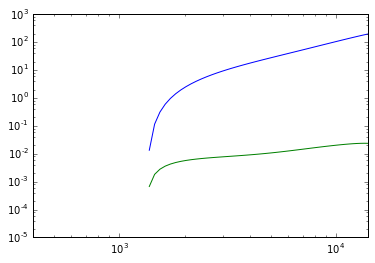

In [37]:
tau = pt['tau [Mpc]']
plt.loglog(np.abs(tau),np.abs(pt['L']),np.abs(tau),np.abs(pt['L_prime']))
plt.ylim([0.00001,1000])
plt.xlim([400,14000])